In [1]:
library(igraph)
library(spectralGraphTopology)
library(sparseGraph)
library(lgmrf)
library(matrixStats)
library(latex2exp)
library(scales)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘spectralGraphTopology’


The following object is masked from ‘package:stats’:

    D




In [2]:
set.seed(42)

# Generating BA one graph

In [3]:
# number of nodes
p <- 100
# generate a grid graph
ba_game <- sample_pa(n = p, m = 1, directed = FALSE, zero.appeal = 0)
# Randomly assign weights to the edges
E(ba_game)$weight <- runif(gsize(ba_game), min = 2, max = 5)
# Get the true Laplacian matrices
Ltrue <- as.matrix(laplacian_matrix(ba_game))

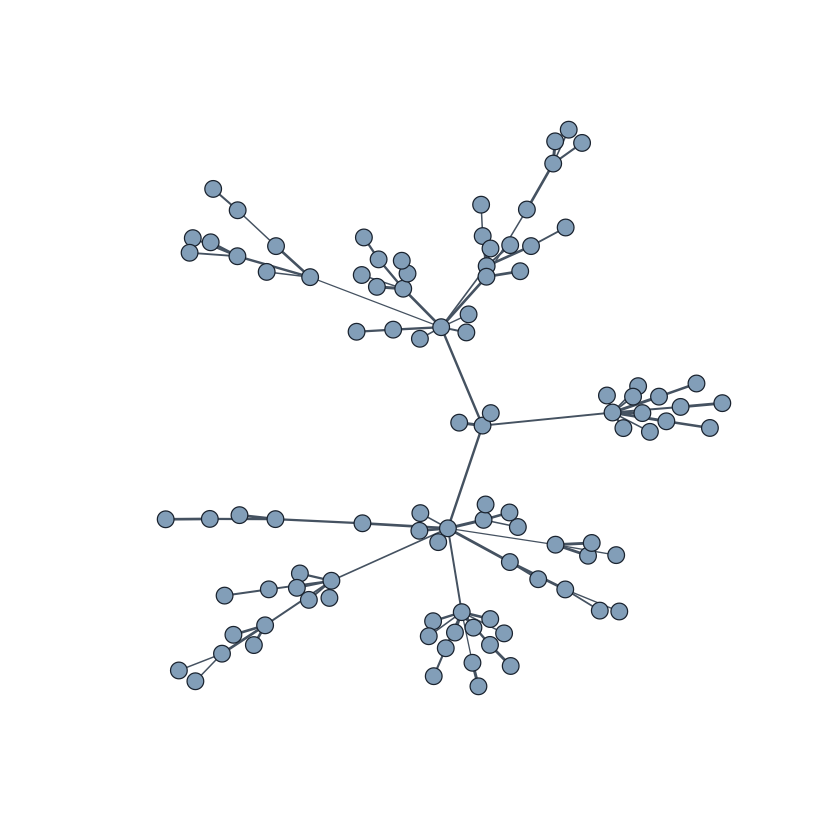

In [4]:
la_true <- layout_nicely(ba_game)
V(ba_game)$color = "#94aec5"
E(ba_game)$color = "#576574"
plot(ba_game, layout = la_true, vertex.frame.color = "#222f3e",
     vertex.label = NA, vertex.size = 6, vertex.label.color = "#34495e",
     vertex.shape = 'circle', edge.width=(0.5*E(ba_game)$weight))

# Learning BA one Graph

In [5]:
# Compute the sample covariance matrix
sample <- 0.75 * p
X <- MASS::mvrnorm(sample, mu = rep(0, p), Sigma = MASS::ginv(Ltrue))
S <- cov(X)

# GLE-ADMM method

In [6]:
graph_admm <- learn_laplacian_gle_admm(S = S, alpha = 0, reltol = 1e-7, verbose = FALSE)

[1] "F-score and Relative Error:"
[1] 0.4937656 0.2971502


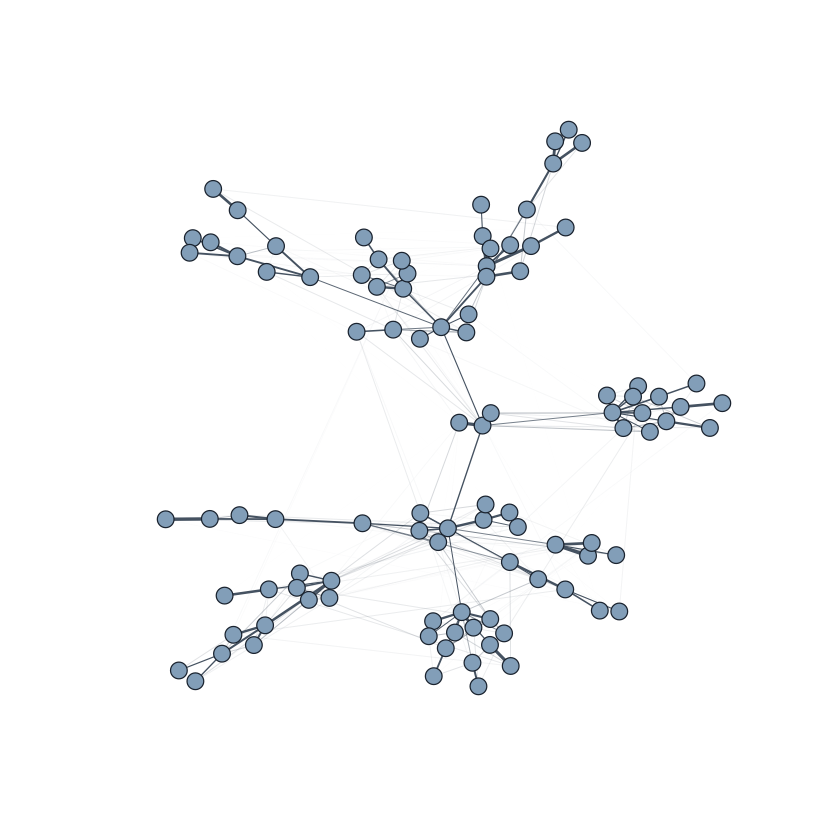

In [7]:
print("F-score and Relative Error:")
print(c(fscore(Ltrue, graph_admm$laplacian, 1e-5), relative_error(graph_admm$laplacian, Ltrue)))
Adj <- graph_admm$adjacency
Adj[Adj < 1e-5] <- 0
ba_admm <- graph_from_adjacency_matrix(adjmatrix = Adj, mode = "undirected", weighted = TRUE)
V(ba_admm)$color = "#94aec5"
E(ba_admm)$color = "#576574" 
plot(ba_admm, layout = la_true, vertex.frame.color = "#222f3e", vertex.label.color = "#34495e",
         vertex.label = NA, vertex.size = 6, vertex.shape = 'circle', edge.width=(0.5*E(ba_admm)$weight))


# ALPE method

In [8]:
graph_alpe <- learn_laplacian_alpe(S = S, lmbd = 2e-2, eps = 1e-4, q = 2)

[1] "F-score and Relative Error:"
[1] 1.0000000 0.1128276


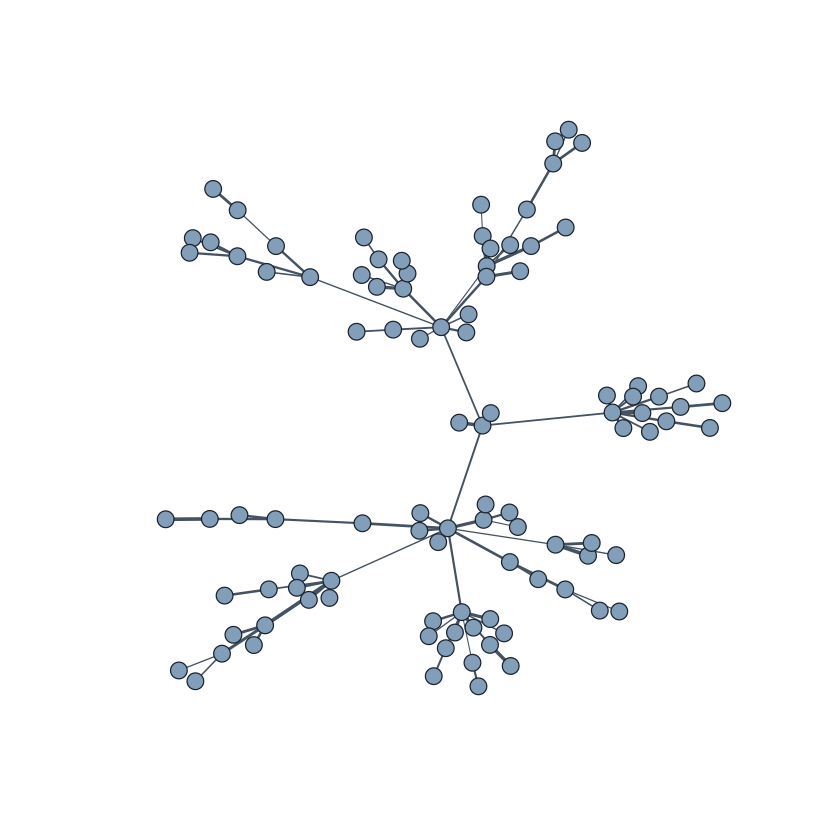

In [9]:
print("F-score and Relative Error:")
print(c(fscore(Ltrue, graph_alpe$laplacian, 1e-5), relative_error(graph_alpe$laplacian, Ltrue)))
Adj <- graph_alpe$adjacency
Adj[Adj < 1e-5] <- 0
ba_alpe <- graph_from_adjacency_matrix(adjmatrix = Adj, mode = "undirected", weighted = TRUE)
V(ba_alpe)$color = "#94aec5"
E(ba_alpe)$color = "#576574" 
plot(ba_alpe, layout = la_true, vertex.frame.color = "#222f3e", vertex.label.color = "#34495e",
         vertex.label = NA, vertex.size = 6, vertex.shape = 'circle', edge.width=(0.5*E(ba_alpe)$weight))